## What are Embeddings?

Think of embeddings as a way to translate words into a language that computers understand - numbers!

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Simplified 2D example (real embeddings have hundreds of dimenstions)

word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

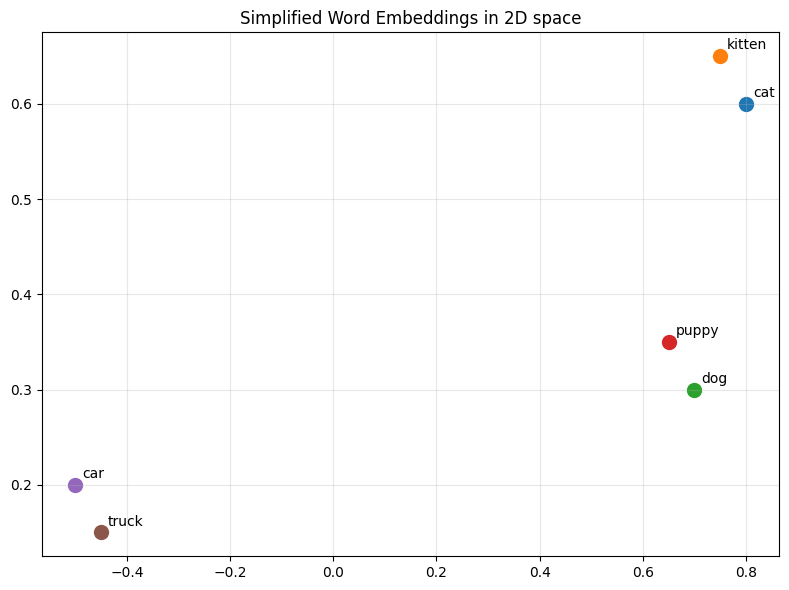

In [6]:
fig, ax = plt.subplots(figsize=(8,6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5,5),
                textcoords='offset points'
    )

ax.set_label('Dimension 1')
ax.set_label('Dimension 2')

ax.set_title('Simplified Word Embeddings in 2D space')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [9]:
## Measuring Similarity

def cosine_similarity(vec1, vec2):
    """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not Related
    - Result close to -1: Opposite meanings
    """

    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1) # Magnitude of Vector 1
    norm_b = np.linalg.norm(vec2) # Magnitude of Vector 2

    return dot_product/(norm_a * norm_b)

In [12]:
# Example
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity = cosine_similarity(cat_vector, kitten_vector)
cat_car_similarity = cosine_similarity(cat_vector, car_vector)

cat_kitten_similarity
cat_car_similarity

np.float64(-0.43718588548916804)